In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
missing_values = ['?', ' ?', '? ']
dataset = pd.read_csv('automobile.csv', na_values = missing_values, header = None)
dataset.dropna(inplace = True)

In [3]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [2,3,4,5,6,7,8,14,15,17])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

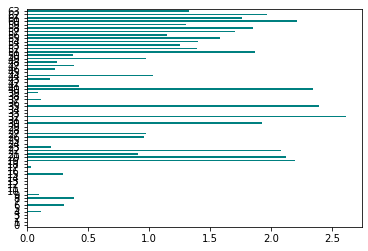

In [5]:
#feature selection
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
importances = mutual_info_classif(x, y)
df = pd.DataFrame(x)
feat_importances = pd.Series(importances, df.columns[0: len(df.columns)])
feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 49: ] = sc.fit_transform(x_train[:, 49: ])
x_test[:, 49: ] = sc.transform(x_test[:, 49: ])

In [8]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10)
ffs = SequentialFeatureSelector(regressor, k_features = 'best', forward = True, n_jobs = -1)
ffs.fit(x, y)
features = list(ffs.k_feature_names_)
features = list(map(int, features))

In [9]:
#feature selection
x_train = x_train[:, features]
x_test = x_test[:, features]
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
importances = mutual_info_classif(x_train, y_train)
df = pd.DataFrame(x_train)
feat_importances = pd.Series(importances, df.columns[0: len(df.columns)])
feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()

IndexError: index 40 is out of bounds for axis 0 with size 32

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 8, kernel = 'rbf')
x_train = kpca.fit_transform(x_train)
x_test = kpca.transform(x_test)

In [ ]:
#feature selection
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
importances = mutual_info_classif(x_train, y_train)
df = pd.DataFrame(x_train)
feat_importances = pd.Series(importances, df.columns[0: len(df.columns)])
feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()

In [ ]:
regressor.fit(x_train, y_train)

In [ ]:
y_pred = regressor.predict(x_test)
np.set_printoptions(suppress=True)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train[f], y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))